<a href="https://colab.research.google.com/github/maxwellfundi/advanced_deep_learning/blob/main/J_Njiru_Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing needed libraries

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from collections import Counter

In [26]:
# Load the imbalanced dataset
df = pd.read_csv('Imbalanced_data.csv', header=None)

# Separate features (X) and target (y)
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({0.0: 9900, 1.0: 100})


In [27]:
# Initialize SMOTE and Borderline SMOTE objects
smote = SMOTE(random_state=42)
borderline = BorderlineSMOTE(random_state=42)
# Apply SMOTE and BorderlineSMOTE to the dataset
# Resample the minority class to balance the dataset
X_smote, y_smote = smote.fit_resample(x, y)
X_borderline, y_borderline = borderline.fit_resample(x, y)

print('SMOTE resampled dataset shape %s' % Counter(y_smote))
print('Boarderline resampled dataset shape %s' % Counter(y_borderline))

SMOTE resampled dataset shape Counter({0.0: 9900, 1.0: 9900})
Boarderline resampled dataset shape Counter({0.0: 9900, 1.0: 9900})


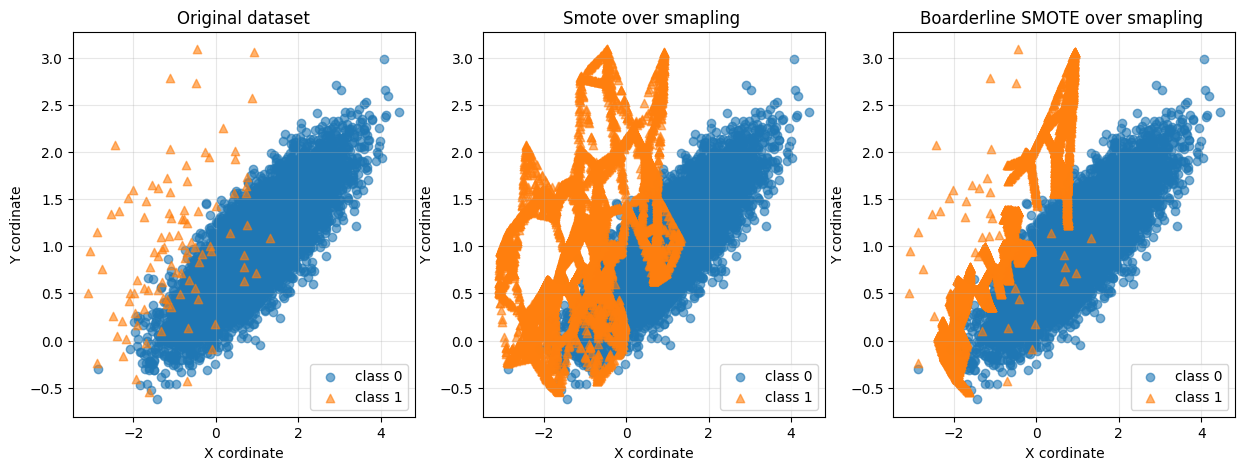

In [28]:
# Create a figure and a subplots
plt.figure(figsize=(15, 5))

plt.subplot(131)
for label in [0,1]:
  mask = y == label
  plt.scatter(X[mask, 0], X[mask, 1], label=f'class {label}',alpha=0.6,marker='o' if label == 0 else '^')

plt.title('Original dataset')
plt.xlabel('X cordinate')
plt.ylabel('Y cordinate')
plt.grid(True, alpha =0.3)
plt.legend()

#Smote oversmapling
plt.subplot(132)
for label in [0,1]:
  mask = y_smote == label
  plt.scatter(X_smote[mask, 0], X_smote[mask, 1], label=f'class {label}',alpha=0.6,marker='o' if label == 0 else '^')

plt.title('Smote over smapling ')
plt.xlabel('X cordinate')
plt.ylabel('Y cordinate')
plt.grid(True, alpha =0.3)
plt.legend()


#Borderline oversampling
plt.subplot(133)
for label in [0,1]:
  mask = y_borderline == label
  plt.scatter(X_borderline[mask, 0], X_borderline[mask, 1], label=f'class {label}', alpha=0.6,marker='o' if label == 0 else '^')

plt.title('Boarderline SMOTE over smapling ')
plt.xlabel('X cordinate')
plt.ylabel('Y cordinate')
plt.grid(True, alpha =0.3)
plt.legend()


In [29]:
# Create DataFrames for SMOTE and Borderline SMOTE resampled data
smote_df = pd.DataFrame(np.column_stack((X_smote, y_smote)))
borderline_df = pd.DataFrame(np.column_stack((X_borderline, y_borderline)))

# Save the resampled data to CSV files
smote_df.to_csv('smote_data.csv', index=False, header=False)
borderline_df.to_csv('borderline_data.csv', index=False)